In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from scipy.stats import linregress
from matplotlib import pyplot as plt
import hvplot.pandas
import json
from config import geoapify_key
import seaborn as sns

In [3]:
#Read raw data
college_info = pd.read_csv('../data/Kmeans_assignment_data.csv')
college_salary = pd.read_csv('../data/College_Salaries.csv')

#Merge the two data
college_df = pd.merge(college_info,college_salary,how='inner',)
college_df = {'School Name': college_df['School Name'],
              'Private': college_df['Private'],
              'Apps': college_df['Apps'],
              'Accept': college_df['Accept'],
              'Tuition/Semester': college_df['Outstate'],
              'Personal Spending/Semester': college_df['Personal'],
              'Book Costs/Semester': college_df['Books'],
              'Room & Board/Semester': college_df['Room.Board'],
              'Early Career Pay': college_df['Early Career Pay'],
              'Mid-Career Pay': college_df['Mid-Career Pay'],
              '% STEM Degrees': college_df['% STEM Degrees'],
              '% Grad rate': college_df['Grad.Rate'] }
college_final_df = pd.DataFrame(college_df)

#changing the types and adding different collumns to see other metrics
college_final_df['Total Cost/Semester'] = college_final_df[['Personal Spending/Semester', 'Tuition/Semester', 'Book Costs/Semester', 'Room & Board/Semester']].sum(axis=1)
college_final_df['Acceptance Rate'] = college_final_df['Accept'] / college_final_df['Apps']
college_final_df['Early Career Pay'] = college_final_df['Early Career Pay'].str.replace('$', '').str.replace(',','').astype(int)
college_final_df['Mid-Career Pay'] = college_final_df['Mid-Career Pay'].str.replace('$', '').str.replace(',','').astype(int)
college_final_df['% STEM Degrees'] = college_final_df['% STEM Degrees'].str.replace('%', '').astype(int)
college_final_df['Early Career Pay / Cost'] = college_final_df['Early Career Pay'] / college_final_df['Total Cost/Semester']
college_final_df['Mid-Career Pay / Cost'] = college_final_df['Mid-Career Pay'] / college_final_df['Total Cost/Semester']
college_final_df['Expected Early Career Pay / cost'] = ((college_final_df['Early Career Pay']*(college_final_df['% Grad rate']*0.01))+(40000*(1-(college_final_df['% Grad rate']*0.01))))/(college_final_df['Total Cost/Semester']*8)
college_final_df['Expected Mid-Career Pay / cost'] = ((college_final_df['Mid-Career Pay']*(college_final_df['% Grad rate']*0.01))+(40000*(1-(college_final_df['% Grad rate']*0.01))))/(college_final_df['Total Cost/Semester']*8)

college_final_df

,School Name,Private,Apps,Accept,Tuition/Semester,Personal Spending/Semester,Book Costs/Semester,Room & Board/Semester,Early Career Pay,Mid-Career Pay,% STEM Degrees,% Grad rate,Total Cost/Semester,Acceptance Rate,Early Career Pay / Cost,Mid-Career Pay / Cost,Expected Early Career Pay / cost,Expected Mid-Career Pay / cost
0,Abilene Christian University,Yes,1660,1232,7440,2200,450,3300,61500,110800,7,60,13390,0.742169,4.592980,8.274832,0.493839,0.769978
1,Adelphi University,Yes,2186,1924,12280,1500,750,6450,64500,108000,8,56,20980,0.880146,3.074357,5.147760,0.320067,0.465205
2,Adrian College,Yes,1428,1097,11250,1165,400,3750,52400,89200,11,54,16565,0.768207,3.163296,5.384848,0.352369,0.502324
3,Agnes Scott College,Yes,417,349,12960,875,450,5450,58300,99400,20,59,19735,0.836930,2.954142,5.036737,0.321744,0.475336
4,Alaska Pacific University,Yes,193,146,7560,1500,800,4120,59700,102000,1,15,13980,0.756477,4.270386,7.296137,0.384075,0.440808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,Worcester Polytechnic Institute,Yes,2768,2314,15884,730,530,5370,89100,161000,86,82,22514,0.835983,3.957538,7.151106,0.445623,0.772963
449,Xavier University,Yes,1959,1805,11520,1250,600,4960,64400,112900,5,83,18330,0.921388,3.513366,6.159302,0.410884,0.685400
450,Xavier University of Louisiana,Yes,2097,1915,6900,781,617,4200,54200,102200,33,49,12498,0.913209,4.336694,8.177308,0.469655,0.704893
451,Yale University,Yes,10705,2453,19840,2115,630,6510,89700,168300,27,99,29095,0.229145,3.083004,5.784499,0.383240,0.717550


In [4]:
college_final_df.to_csv('college_clean.csv',index=False, header=True)

In [21]:
# Summary of Everything...
sorted_data = college_final_df.sort_values(by=['Tuition/Semester', 'Early Career Pay', 'Mid-Career Pay'], ascending=False)

# top 10 rows
top_10_tuition = sorted_data.nlargest(10, 'Tuition/Semester')[['School Name', 'Private', 'Tuition/Semester', 'Early Career Pay', 'Mid-Career Pay']]
top_10_starting_income = sorted_data.nlargest(10, 'Early Career Pay')[['School Name', 'Private', 'Tuition/Semester', 'Early Career Pay', 'Mid-Career Pay']]
top_10_mid_career_income = sorted_data.nlargest(10, 'Mid-Career Pay')[['School Name', 'Private', 'Tuition/Semester', 'Early Career Pay', 'Mid-Career Pay']]

# Display the new DataFrame as a table
print(top_10_tuition)
print(top_10_starting_income)
print(top_10_mid_career_income)


                               School Name Private  Tuition/Semester  \
32                      Bennington College     Yes             21700   
214  Massachusetts Institute of Technology     Yes             20100   
134                     Gettysburg College     Yes             19964   
278                           Reed College     Yes             19960   
272                   Princeton University     Yes             19900   
451                        Yale University     Yes             19840   
13                         Amherst College     Yes             19760   
145                       Hamilton College     Yes             19700   
255                        Oberlin College     Yes             19670   
441                       Williams College     Yes             19629   

     Early Career Pay  Mid-Career Pay  
32              57500          109700  
214            106400          189400  
134             72000          145200  
278             70300          138400  
272    

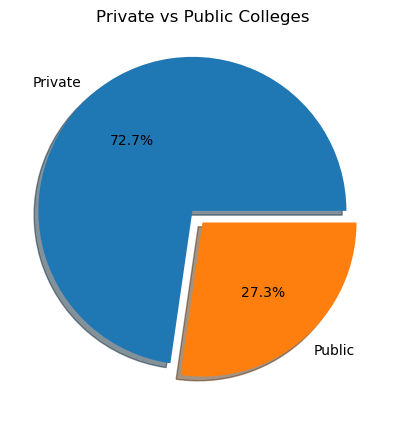

In [12]:
# Pie Graph of Number of Private vs Public

pie1_data = college_info['Private'].value_counts()
labels = "Private", "Public"
explode = (0.1, 0)
plt.figure(figsize=(5,5))
plt.pie(pie1_data, labels=labels, explode=explode, shadow=True, autopct='%1.1f%%')
plt.title ("Private vs Public Colleges")
plt.savefig("../images/number_of_private_vs_public_schools_(pie_graph).png")

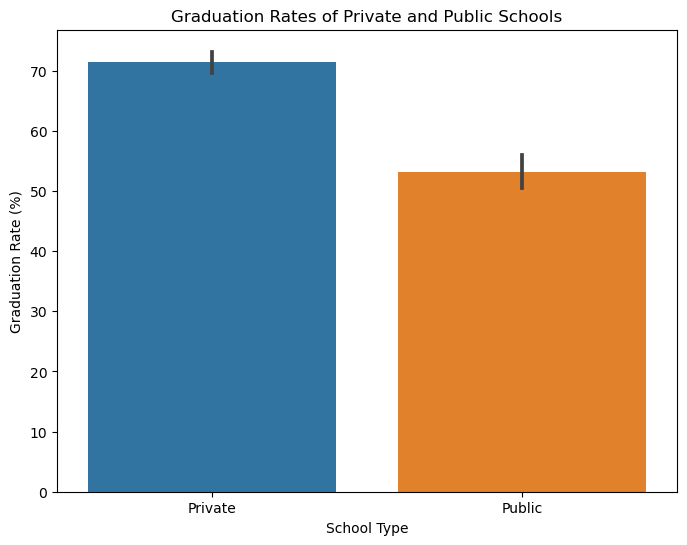

In [26]:
# Bar plot: Graduation rates of private and public schools
plt.figure(figsize=(8, 6))
sns.barplot(x='Private', y='% Grad rate', data=college_final_df)
plt.title('Graduation Rates of Private and Public Schools')
plt.xlabel('School Type')
plt.ylabel('Graduation Rate (%)')
plt.xticks(ticks=[0, 1], labels=['Private', 'Public'])  
plt.savefig('../images/graduation_rates_public_and_private')
plt.show()

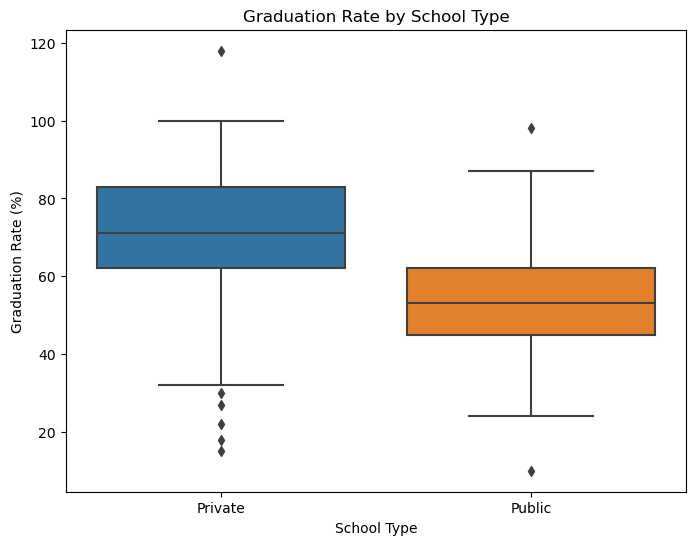

In [33]:
# Box plot: Graduation Rate by School Type
plt.figure(figsize=(8, 6))
sns.boxplot(x='Private', y='% Grad rate', data=college_final_df)
plt.title('Graduation Rate by School Type')
plt.xlabel('School Type')
plt.ylabel('Graduation Rate (%)')
plt.xticks(ticks=[0, 1], labels=['Private', 'Public'])  

plt.show()

In [15]:
mean_total_cost = college_final_df.groupby("Private")['Total Cost/Semester'].mean()
mean_early_pay = college_final_df.groupby("Private")['Early Career Pay'].mean()
mean_expected_early = college_final_df.groupby("Private")['Expected Early Career Pay / cost'].mean()
mean_mid_pay = college_final_df.groupby("Private")['Mid-Career Pay'].mean()
mean_expected_mid = college_final_df.groupby("Private")['Expected Mid-Career Pay / cost'].mean()
mean_accept_rate = college_final_df.groupby("Private")['Acceptance Rate'].mean()
mean_stem_deg = college_final_df.groupby("Private")['% STEM Degrees'].mean()
mean_grad_rate = college_final_df.groupby("Private")['% Grad rate'].mean()


college_means_df = pd.DataFrame({'Avg Total Cost':mean_total_cost,
                                 'Avg Start Salary':mean_early_pay,
                                 'Avg Instant ROI':mean_expected_early,
                                 'Avg Mid Salary':mean_mid_pay,
                                 'Avg Long Term ROI':mean_expected_mid,
                                 'Avg Accept Rate':mean_accept_rate * 100,
                                 'Avg % STEM Majors':mean_stem_deg,
                                 'Avg Grad Rate':mean_grad_rate,
                                 })

college_means_df_rounded = college_means_df.round({'Avg Total Cost': 0,
                                                  'Avg Start Salary':0,
                                                  'Avg Instant ROI': 2,
                                                  'Avg Mid Salary': 0,
                                                  'Avg Long Term ROI': 2,
                                                  'Avg Accept Rate': 0,
                                                  'Avg % STEM Majors': 0,
                                                  'Avg Grad Rate': 0,
                                                 })
college_means_df_rounded

,Avg Total Cost,Avg Start Salary,Avg Instant ROI,Avg Mid Salary,Avg Long Term ROI,Avg Accept Rate,Avg % STEM Majors,Avg Grad Rate
Private,,,,,,,,
No,12355.0,60842.0,0.54,105500.0,0.79,75.0,17.0,53.0
Yes,19091.0,64053.0,0.39,114808.0,0.64,73.0,19.0,71.0


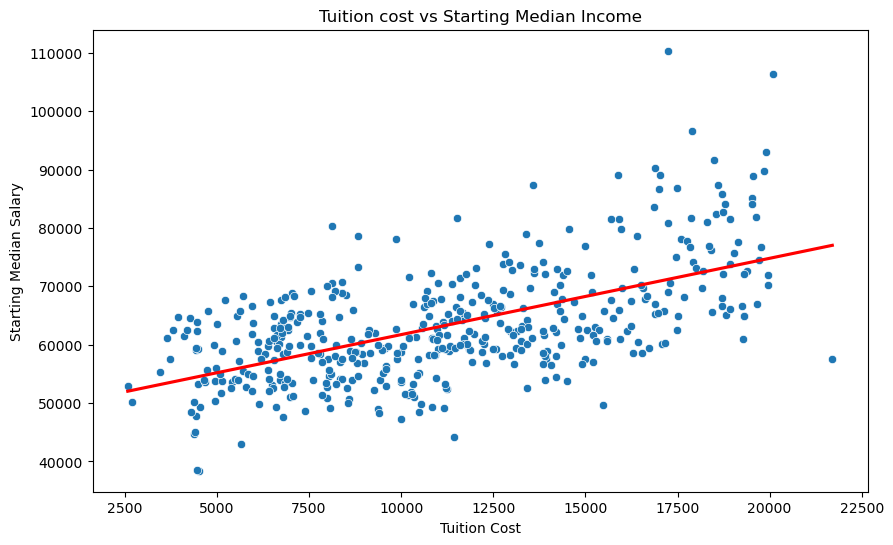

Correlation between Tuition cost and Starting Median Income: 0.5925665296512272


In [11]:
# Scatter plot: Tuition cost vs Starting Median Income
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Tuition/Semester', y='Early Career Pay', data=college_final_df)
sns.regplot(x='Tuition/Semester', y='Early Career Pay', data=college_final_df, scatter=False, color='red', ci=None)
plt.title('Tuition cost vs Starting Median Income')
plt.xlabel('Tuition Cost')
plt.ylabel('Starting Median Salary')
plt.savefig('../images/tuition_cost_vs_starting_median_income')
plt.show()

# Calculate correlation between Tuition cost and Starting Median Income

correlation = college_final_df['Tuition/Semester'].corr(college_final_df['Early Career Pay'])
print("Correlation between Tuition cost and Starting Median Income:", correlation)


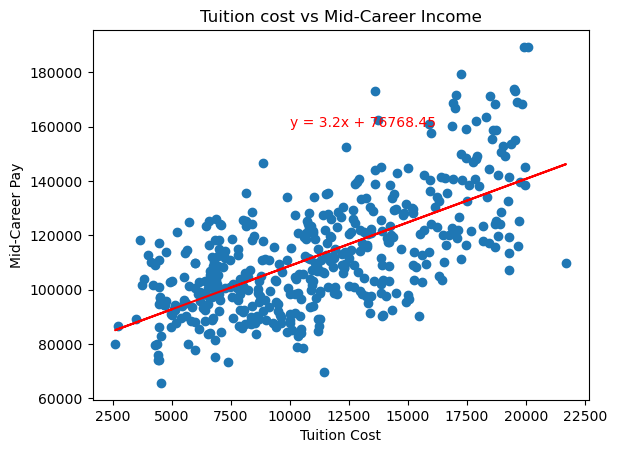

Correlation between Tuition cost and Mid-Career Median Income: 0.6568233465690861


In [28]:
plt.scatter(college_final_df['Tuition/Semester'], college_final_df['Mid-Career Pay'])


(slope, intercept, r_value, p_value, std_err) = linregress(college_final_df['Tuition/Semester'], college_final_df['Mid-Career Pay'])
regression_line = college_final_df ['Tuition/Semester'] * round(slope, 2) + round(intercept, 2)
line = f'y = {round(slope, 2)}x + {round(intercept, 2)}'
plt.plot(college_final_df['Tuition/Semester'], regression_line, color='red')

plt.annotate(line, (10000, 160000), color='red')

plt.title('Tuition cost vs Mid-Career Income')
plt.xlabel('Tuition Cost')
plt.ylabel('Mid-Career Pay')
plt.savefig('../data/tuition_cost_vs_mid_career_income')
plt.show()
# Calculate correlation between Tuition cost and Mid-Career Median Income

correlation = college_final_df['Tuition/Semester'].corr(college_final_df['Mid-Career Pay'])
print("Correlation between Tuition cost and Mid-Career Median Income:", correlation)

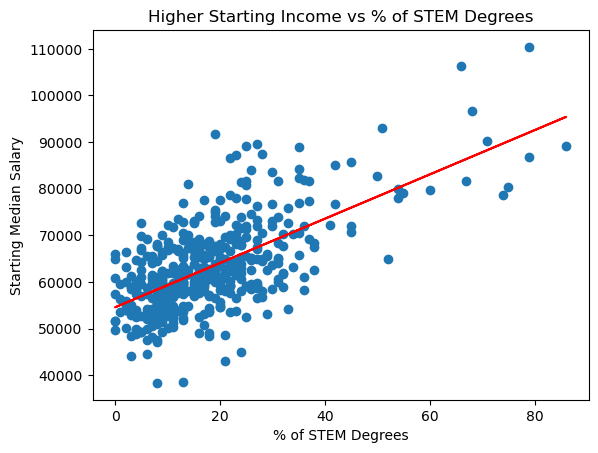

Correlation between Tuition cost and Mid-Career Median Income: 0.6373078449259939


In [29]:
plt.scatter(college_final_df['% STEM Degrees'], college_final_df['Early Career Pay'])
(slope, intercept, r_value, p_value, std_err) = linregress(college_final_df['% STEM Degrees'], college_final_df['Early Career Pay'])
regression_line = college_final_df['% STEM Degrees'] * round(slope, 2) + round(intercept, 2)
line = f'y = {round(slope, 2)}x + {round(intercept, 2)}'
plt.plot(college_final_df['% STEM Degrees'], regression_line, color='red')

plt.annotate(line, (10000, 160000), color='red')

plt.title('Higher Starting Income vs % of STEM Degrees')
plt.xlabel('% of STEM Degrees')
plt.ylabel('Starting Median Salary')
plt.savefig('../images/%_stem_degrees_vs_starting_income.png')
plt.show()

correlation = college_final_df['% STEM Degrees'].corr(college_final_df['Early Career Pay'])
print("Correlation between Tuition cost and Mid-Career Median Income:", correlation)

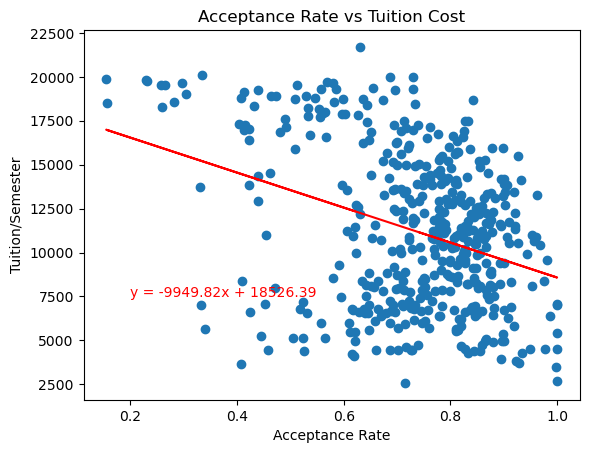

In [31]:
plt.scatter(college_final_df['Acceptance Rate'], college_final_df['Tuition/Semester'])
(slope, intercept, r_value, p_value, std_err) = linregress(college_final_df['Acceptance Rate'], college_final_df['Tuition/Semester'])
regression_line = college_final_df['Acceptance Rate'] * round(slope, 2) + round(intercept, 2)
line = f'y = {round(slope, 2)}x + {round(intercept, 2)}'
plt.plot(college_final_df['Acceptance Rate'], regression_line, color='red')

plt.annotate(line, (0.2, 7500), color='red')

plt.title('Acceptance Rate vs Tuition Cost')
plt.xlabel('Acceptance Rate')
plt.ylabel('Tuition/Semester')
plt.savefig('../images/acceptance_rate_vs_tuition_cost')
plt.show()

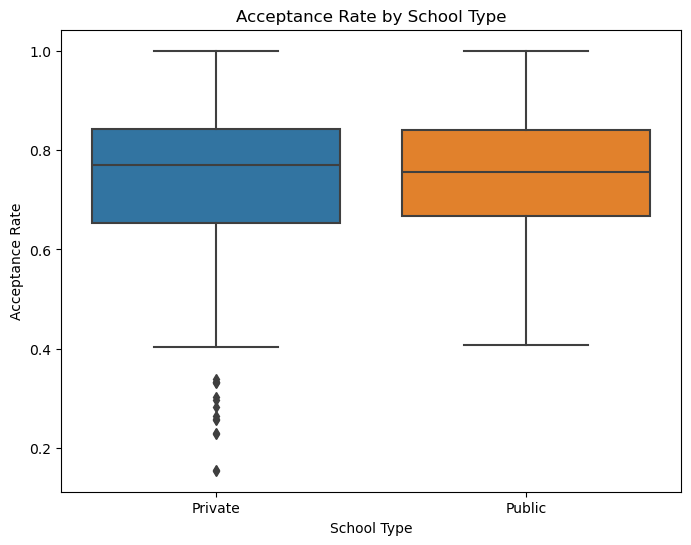

In [32]:
# Box plot: Acceptance Rate by School Type
plt.figure(figsize=(8, 6))
sns.boxplot(x='Private', y='Acceptance Rate', data=college_final_df)
plt.title('Acceptance Rate by School Type')
plt.xlabel('School Type')
plt.ylabel('Acceptance Rate')
plt.xticks(ticks=[0, 1], labels=['Private', 'Public'])  


plt.show()

In [13]:
college_final_df["Lat"] = ""
college_final_df["Lon"] = ""
base_url = "https://api.geoapify.com/v1/geocode/search"
params = {"apiKey":geoapify_key,
          "format":"json",
          'country':'United States of America'}

In [14]:
print("Starting Coordinate Search by College Name")
for index, row in college_final_df.iterrows():
    school_name = college_final_df.loc[index, "School Name"]
    params["text"] = f'{school_name}'
    response = requests.get(base_url, params=params)
    response = response.json()
    try:
        college_final_df.loc[index, "Lat"] = response["results"][0]["lat"]
        college_final_df.loc[index, "Lon"] = response["results"][0]["lon"]
    except (KeyError, IndexError):
        college_final_df.loc[index, "Lat"] = "Not Found"
        college_final_df.loc[index, "Lon"] = "Not Found"

    print(f'Coordinates for {school_name} found...')

college_final_df.head()

Starting Coordinate Search by College Name
Coordinates for Abilene Christian University found...
Coordinates for Adelphi University found...
Coordinates for Adrian College found...
Coordinates for Agnes Scott College found...
Coordinates for Alaska Pacific University found...
Coordinates for Albertus Magnus College found...
Coordinates for Albion College found...
Coordinates for Albright College found...
Coordinates for Alfred University found...
Coordinates for Allegheny College found...
Coordinates for Alma College found...
Coordinates for Alverno College found...
Coordinates for American International College found...
Coordinates for Amherst College found...
Coordinates for Andrews University found...
Coordinates for Angelo State University found...
Coordinates for Antioch University found...
Coordinates for Appalachian State University found...
Coordinates for Aquinas College found...
Coordinates for Arkansas Tech University found...
Coordinates for Augustana College found...
Coord

,School Name,Private,Apps,Accept,Tuition/Semester,Personal Spending/Semester,Book Costs/Semester,Room & Board/Semester,Early Career Pay,Mid-Career Pay,% STEM Degrees,% Grad rate,Total Cost/Semester,Acceptance Rate,Early Career Pay / Cost,Mid-Career Pay / Cost,Expected Early Career Pay / cost,Expected Mid-Career Pay / cost,Lat,Lon
0,Abilene Christian University,Yes,1660,1232,7440,2200,450,3300,61500,110800,7,60,13390,0.742169,4.592980,8.274832,0.493839,0.769978,32.479488,-99.709501
1,Adelphi University,Yes,2186,1924,12280,1500,750,6450,64500,108000,8,56,20980,0.880146,3.074357,5.147760,0.320067,0.465205,40.74389,-73.98611
2,Adrian College,Yes,1428,1097,11250,1165,400,3750,52400,89200,11,54,16565,0.768207,3.163296,5.384848,0.352369,0.502324,41.898495,-84.060832
3,Agnes Scott College,Yes,417,349,12960,875,450,5450,58300,99400,20,59,19735,0.836930,2.954142,5.036737,0.321744,0.475336,33.768885,-84.294445
4,Alaska Pacific University,Yes,193,146,7560,1500,800,4120,59700,102000,1,15,13980,0.756477,4.270386,7.296137,0.384075,0.440808,45.506281,-122.593385


In [18]:
%%capture --no-display
min_pay = college_final_df["Early Career Pay"].min()
max_pay = college_final_df["Early Career Pay"].max()
college_final_df["scaled_size"] = 10 + 100 * ((college_final_df["Early Career Pay"] - min_pay) / (max_pay - min_pay))

test_map_1 = college_final_df.hvplot.points("Lon",
                                             "Lat",
                                              geo = True,
                                              tiles = 'OSM',
                                              frame_width = 1000,
                                              frame_height = 800,
                                              size = 'scaled_size',
                                              color = "Private",
                                              hover_cols = ["School Name","Total Cost/Semester","Grad Rate","Mid-Career Pay"])
                                              
test_map_1
hvplot.save(test_map_1, '../images/Early Career Pay.html')

In [19]:
%%capture --no-display
min_pay = college_final_df["Mid-Career Pay"].min()
max_pay = college_final_df["Mid-Career Pay"].max()
college_final_df["scaled_size"] = 10 + 100 * ((college_final_df["Mid-Career Pay"] - min_pay) / (max_pay - min_pay))

test_map_2 = college_final_df.hvplot.points("Lon",
                                             "Lat",
                                              geo = True,
                                              tiles = 'OSM',
                                              frame_width = 1000,
                                              frame_height = 800,
                                              size = 'scaled_size',
                                              color = "Private",
                                              hover_cols = ["School Name","Total Cost/Semester","Grad Rate","Mid-Career Pay"])
                                              
test_map_2
hvplot.save(test_map_2, '../images/Mid Career Pay.html')